## Import and Load File

In [1]:
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from pathlib import Path

#CSV Path
crime_reports_path = 'C:/Users/jrams/Desktop/Crime_Report.csv'
path = os.path.realpath(crime_reports_path)

#read file into df
crime_report_df = pd.read_csv(crime_reports_path, low_memory=False)

def all_data_df(crime_reports_path):                          
    df = pd.read_csv(crime_reports_path, low_memory=False)    
    return df

all_data_df = all_data_df(crime_reports_path)
all_data_df.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2006471156,FAMILY DISTURBANCE,3400,N,02/16/2006 02:25:00 PM,02/16/2006,1425.0,02/16/2006 02:25:00 PM,02/16/2006,1425.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20045044338,TAMPERING WITH ID NUMBER,2719,N,09/14/2004 03:32:00 PM,09/14/2004,1532.0,09/14/2004 03:32:00 PM,09/14/2004,1532.0,...,NaN,N,09/14/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006960811,FAMILY DISTURBANCE,3400,N,04/06/2006 10:29:00 AM,04/06/2006,1029.0,04/06/2006 10:29:00 AM,04/06/2006,1029.0,...,NaN,N,05/01/2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013851154,SEXUAL ASSAULT OF CHILD/OBJECT,1707,Y,01/01/2009 12:01:00 AM,01/01/2009,1.0,03/26/2013 04:56:00 PM,03/26/2013,1656.0,...,4.00,C,04/11/2013,11C,Rape,0.0,0.0,NaN,NaN,NaN
4,20161800084,RAPE OF A CHILD,204,Y,06/28/2016 01:05:00 AM,06/28/2016,105.0,06/28/2016 01:05:00 AM,06/28/2016,105.0,...,24.41,C,07/01/2016,11A,Rape,0.0,0.0,NaN,NaN,NaN


In [2]:
#NEW DATAFRAME WITH ONLY CRIMES AND DATES
date_crime = pd.concat([all_data_df['Occurred Date'], all_data_df['Highest Offense Description']], axis=1)
#print(date_crime)

#LIST OF DIFFERENT CRIMES
crimes = date_crime['Highest Offense Description'].unique()
#print(crimes)

#FILTER ONLY AUTO THEFT CRIME BY DATE - DESCENDING
filtered_Auto_Theft_Crime = date_crime[date_crime['Highest Offense Description'].str.contains('Auto Theft', case=False)]
filtered_Auto_Theft_Crime_sorted = filtered_Auto_Theft_Crime.sort_values(by='Occurred Date', ascending=False)
print(filtered_Auto_Theft_Crime_sorted)


        Occurred Date Highest Offense Description
240125     12/31/2023                  AUTO THEFT
152939     12/31/2023                  AUTO THEFT
149367     12/31/2023                  AUTO THEFT
152795     12/31/2023                  AUTO THEFT
152785     12/31/2023                  AUTO THEFT
...               ...                         ...
2353631    01/01/2003                  AUTO THEFT
1440350    01/01/2003                  AUTO THEFT
593025     01/01/2003                  AUTO THEFT
1494032    01/01/2003                  AUTO THEFT
1430380    01/01/2003                  AUTO THEFT

[62451 rows x 2 columns]


In [3]:
#CONCATENATE DATA FRAMES

all_theft_crimes = pd.concat([filtered_Auto_Theft_Crime], ignore_index=True)

all_theft_crimes['Occurred Date'] = pd.to_datetime(all_theft_crimes['Occurred Date'], format='mixed')

all_theft_crimes['Season'] = pd.cut(                            #|Make bins
    all_theft_crimes['Occurred Date'].dt.dayofyear,             #|Take day of year from 'Occurred Date Column'
    bins= [0, 79, 171, 264, 355, 365],                          #|Create bins for new seasons column              
    labels=['Winter', 'Spring', 'Summer', 'Fall', 'Winter'],    #|Label bins   
    ordered=False                                               
    )

season_theft_crimes = all_theft_crimes.drop(columns=['Occurred Date'])

## Categorize Auto Theft by Season

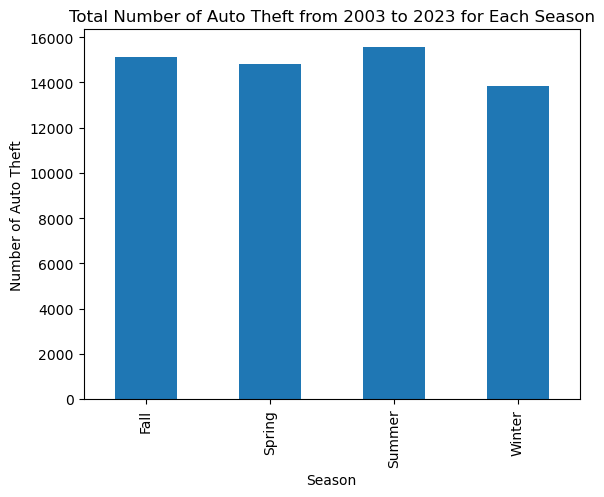

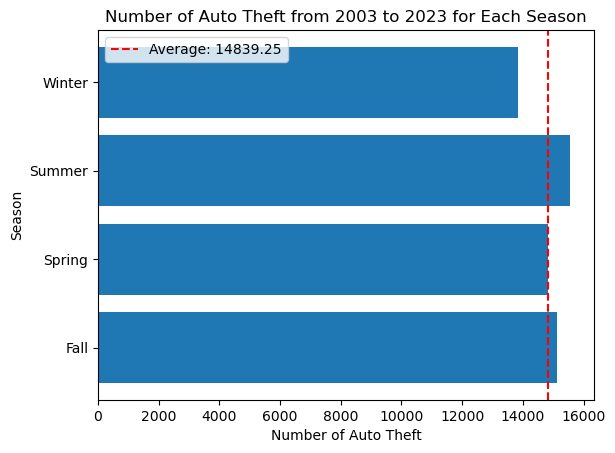

In [4]:
# TOTAL AUTO THEFT IN 2003-2023 PER SEASON

# Filter data 2003 to 2023
filtered_years = all_theft_crimes[(all_theft_crimes['Occurred Date'].dt.year >= 2003) & (all_theft_crimes['Occurred Date'].dt.year <= 2023)]

# Group by season and occurrences
season_counts = filtered_years.groupby('Season', observed=False).size()

# Do bar plot
season_counts.plot(kind='bar')

# Add labels and title
plt.title('Total Number of Auto Theft from 2003 to 2023 for Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Auto Theft')

# Print plot
plt.show()

###############################################################################################################################################

# ADD SEASONAL AVERAGE

# Group by season and calculate the number of auto thefts per season
season_counts = filtered_years.groupby('Season', observed=False)['Occurred Date'].size()

# Calculate the average number of auto thefts per season
season_avg = season_counts.mean()

# Plot the data as a horizontal bar plot
plt.barh(season_counts.index, season_counts)

# Add a line for the average number of auto thefts
plt.axvline(x=season_avg, color='red', linestyle='--', label=f'Average: {season_avg:.2f}')

# Add labels and title
plt.title('Number of Auto Theft from 2003 to 2023 for Each Season')
plt.xlabel('Number of Auto Theft')
plt.ylabel('Season')
plt.legend()

# Show the plot
plt.show()

## Seasonal Trend & Hypothesis

C:\Users\jrams\AppData\Local\Temp\ipykernel_31932\4121579753.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  seasonal_trends = filtered_years.pivot_table(index=filtered_years['Occurred Date'].dt.year, columns='Season', values='Highest Offense Description', aggfunc='count')


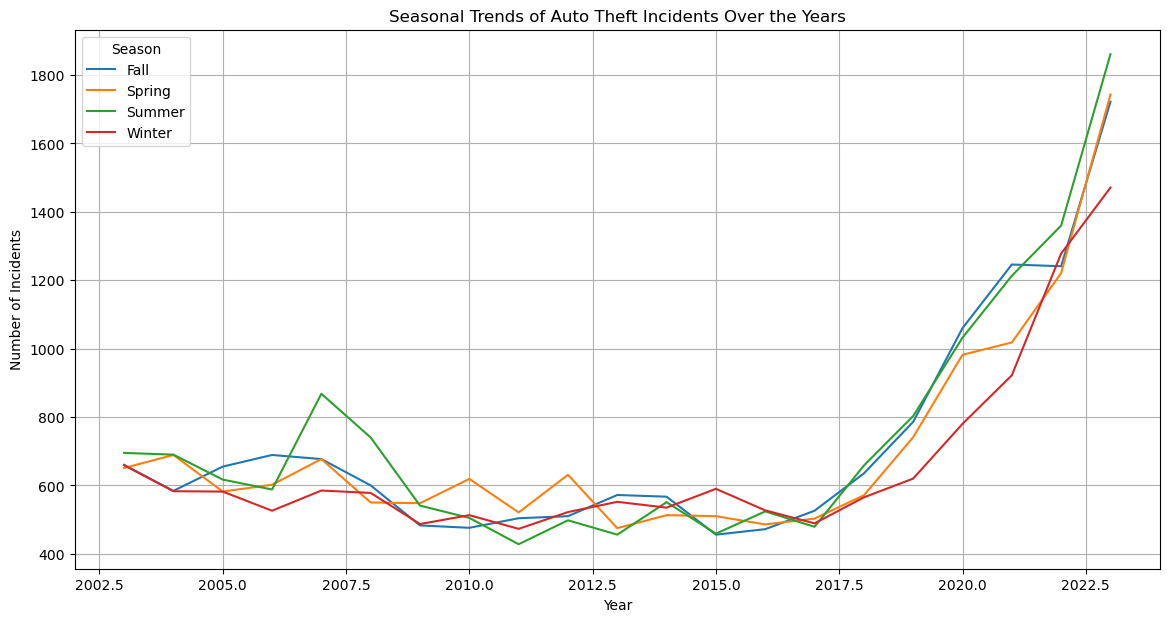

Chi-Square Statistic: 55.050960512761115
p-value: 6.696421256984824e-12


In [5]:
# Create a pivot table with years as rows and seasons as columns
seasonal_trends = filtered_years.pivot_table(index=filtered_years['Occurred Date'].dt.year, columns='Season', values='Highest Offense Description', aggfunc='count')

# Fill NaN values with 0
seasonal_trends.fillna(0, inplace=True)

# Plot the trends
plt.figure(figsize=(14, 7))
for column in seasonal_trends.columns:
    plt.plot(seasonal_trends.index, seasonal_trends[column], label=column)

plt.title('Seasonal Trends of Auto Theft Incidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Season')
plt.grid(True)
plt.show()

# Run hypothesis test
total = season_counts.sum()
expected = np.full(shape=season_counts.shape, fill_value=total / 4)  # Equal distribution among seasons
# Conducting the Chi-square test
chi2, p_value, dof, expected = chi2_contingency([season_counts.values, expected])
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")

#Reject Null Hypothesis - Seasons do impact auto theft

## Comparison of Occurences by Decade

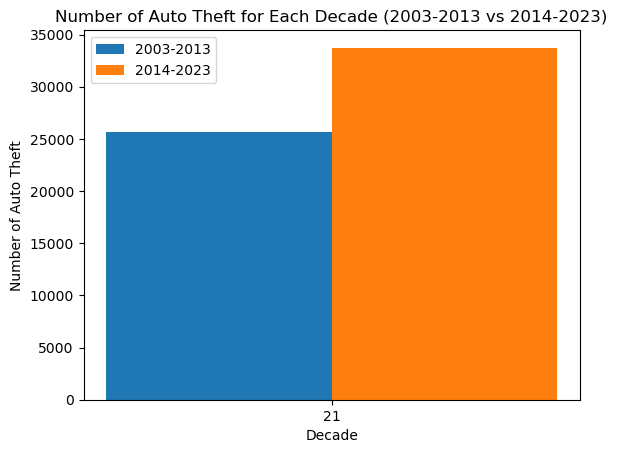

In [6]:
# Filter data for the years 2003 to 2013 and 2014 to 2023
filtered_years_2003_2013 = filtered_years[(filtered_years['Occurred Date'].dt.year >= 2003) & (filtered_years['Occurred Date'].dt.year <= 2013)].copy()
filtered_years_2014_2023 = filtered_years[(filtered_years['Occurred Date'].dt.year >= 2014) & (filtered_years['Occurred Date'].dt.year <= 2023)].copy()

# Extract decade from the date for each time range
filtered_years_2003_2013.loc[:, 'Decade'] = (filtered_years_2003_2013['Occurred Date'].dt.year // 100) + 1
filtered_years_2014_2023.loc[:, 'Decade'] = (filtered_years_2014_2023['Occurred Date'].dt.year // 100) + 1

# Group by decade and calculate the count of occurrences for each time range
decade_counts_2003_2013 = filtered_years_2003_2013.groupby('Decade').size()
decade_counts_2014_2023 = filtered_years_2014_2023.groupby('Decade').size()

# Plot the data as a bar plot
plt.bar(decade_counts_2003_2013.index - 0.2, decade_counts_2003_2013, width=0.4, label='2003-2013')
plt.bar(decade_counts_2014_2023.index + 0.2, decade_counts_2014_2023, width=0.4, label='2014-2023')

# Add labels and title
plt.title('Number of Auto Theft for Each Decade (2003-2013 vs 2014-2023)')
plt.xlabel('Decade')
plt.ylabel('Number of Auto Theft')
plt.xticks(decade_counts_2003_2013.index)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [7]:
#CALCULATE TOTAL NUMBER OF OCCURENCES IN EACH DECADE

# Filter data for the years 2003 to 2013
filtered_years_2003_2013 = filtered_years[(filtered_years['Occurred Date'].dt.year >= 2003) & (filtered_years['Occurred Date'].dt.year <= 2013)].copy()

# Calculate the total number of auto thefts for the period 2003-2013
total_2003_2013 = filtered_years_2003_2013.shape[0]

# Print the total number of occurrences
print(f"Total number of auto thefts from 2003 to 2013: {total_2003_2013}")

# Filter data for the years 2003 to 2013
filtered_years_2003_2013 = filtered_years[(filtered_years['Occurred Date'].dt.year >= 2014) & (filtered_years['Occurred Date'].dt.year <= 2023)].copy()

# Calculate the total number of auto thefts for the period 2003-2013
total_2014_to_2023 = filtered_years_2014_2023.shape[0]

# Print the total number of occurrences
print(f"Total number of auto thefts from 2014 to 2023: {total_2014_to_2023}")

Total number of auto thefts from 2003 to 2013: 25655
Total number of auto thefts from 2014 to 2023: 33733


Percentage Increase in Auto Theft from 2003-2013 to 2014-2023: 31.49%


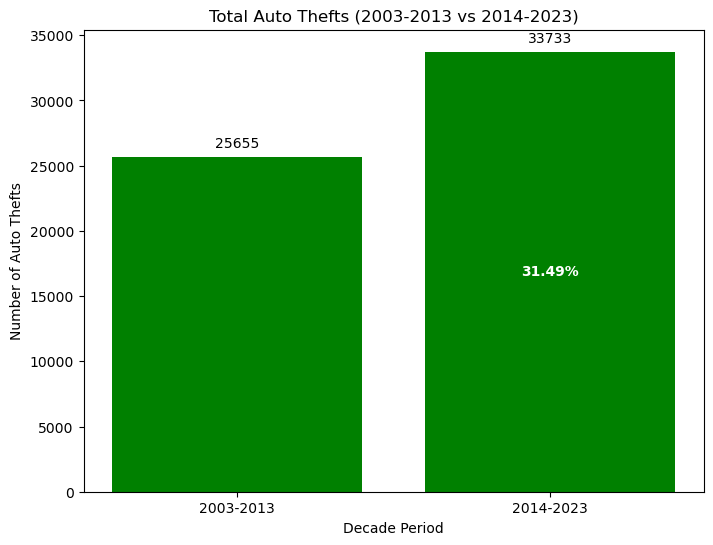

In [8]:
#CALCULATE INCREASE IN REPORTED OCCURENCES IN 2014-2023 COMPARED TO 2003-2013

# Given totals
total_2003_2013 = 25655
total_2014_2023 = 33733

# Calculate the percentage increase
percentage_increase = ((total_2014_2023 - total_2003_2013) / total_2003_2013) * 100

# Print the percentage increase
print(f"Percentage Increase in Auto Theft from 2003-2013 to 2014-2023: {percentage_increase:.2f}%")

# Data for the bar graph
labels = ['2003-2013', '2014-2023']
counts = [total_2003_2013, total_2014_2023]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color='green')

# Annotate the bar plot with the total counts and percentage increase
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'{int(yval)}', ha='center', va='bottom')
    if bar.get_x() == bars[1].get_x():  # Check if it's the 2014-2023 bar
        plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{percentage_increase:.2f}%', ha='center', va='center', color='white', fontweight='bold')

# Add labels and title
plt.title('Total Auto Thefts (2003-2013 vs 2014-2023)')
plt.xlabel('Decade Period')
plt.ylabel('Number of Auto Thefts')

# Show the plot
plt.show()

Percentage of Auto Theft Occurences from 2003 to 2013: -22.89%


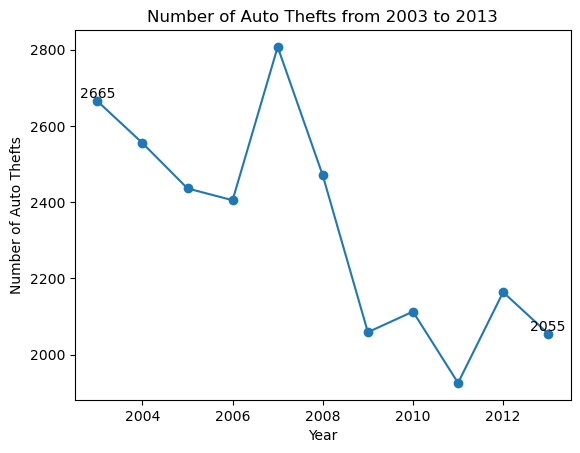

Percentage Increase in Auto Theft Occurences from 2014 to 2023: 213.80%


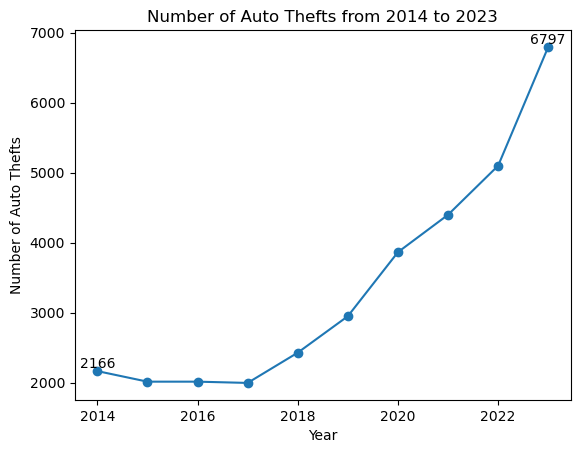

In [9]:
#DISPLAY # OF AUTO THEFTS IN 2003-2023

# Filter data for the years 2003 to 2013
filtered_years_2003_2013 = filtered_years[(filtered_years['Occurred Date'].dt.year >= 2003) & (filtered_years['Occurred Date'].dt.year <= 2013)].copy()

# Group by year and calculate the count of occurrences for each year
yearly_counts_2003_2013 = filtered_years_2003_2013.groupby(filtered_years_2003_2013['Occurred Date'].dt.year).size()

# Calculate the total number of auto thefts in the start year (2003) and end year (2013)
total_2003 = yearly_counts_2003_2013.loc[2003]
total_2013 = yearly_counts_2003_2013.loc[2013]

# Calculate the percentage increase
percentage_increase_2003_2013 = ((total_2013 - total_2003) / total_2003) * 100

# Print the percentage increase
print(f"Percentage of Auto Theft Occurences from 2003 to 2013: {percentage_increase_2003_2013:.2f}%")

# Plot the data as a line plot
plt.plot(yearly_counts_2003_2013.index, yearly_counts_2003_2013.values, marker='o', linestyle='-')

# Annotate the start and end year with the counts
plt.text(2003, total_2003, f"{total_2003}", ha='center', va='bottom')
plt.text(2013, total_2013, f"{total_2013}", ha='center', va='bottom')

# Add labels and title
plt.title('Number of Auto Thefts from 2003 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Auto Thefts')

# Show the plot
plt.show()

#######################################################################################################################################################

#DISPLAY # OF AUTO THEFTS IN 2014 - 2023

# Filter data for the years 2014 to 2023
filtered_years_2014_2023 = filtered_years[(filtered_years['Occurred Date'].dt.year >= 2014) & (filtered_years['Occurred Date'].dt.year <= 2023)].copy()

# Group by year and calculate the count of occurrences for each year
yearly_counts = filtered_years_2014_2023.groupby(filtered_years_2014_2023['Occurred Date'].dt.year).size()

# Calculate the total number of auto thefts in the start year (2014) and end year (2023)
total_2014 = yearly_counts.loc[2014]
total_2023 = yearly_counts.loc[2023]

# Calculate the percentage increase
percentage_increase_2014_2023 = ((total_2023 - total_2014) / total_2014) * 100

# Print the percentage increase
print(f"Percentage Increase in Auto Theft Occurences from 2014 to 2023: {percentage_increase_2014_2023:.2f}%")

# Plot the data as a line plot
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')

# Annotate the start and end year with the counts
plt.text(2014, total_2014, f"{total_2014}", ha='center', va='bottom')
plt.text(2023, total_2023, f"{total_2023}", ha='center', va='bottom')

# Add labels and title
plt.title('Number of Auto Thefts from 2014 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of Auto Thefts')

# Show the plot
plt.show()



## Yearly Trend

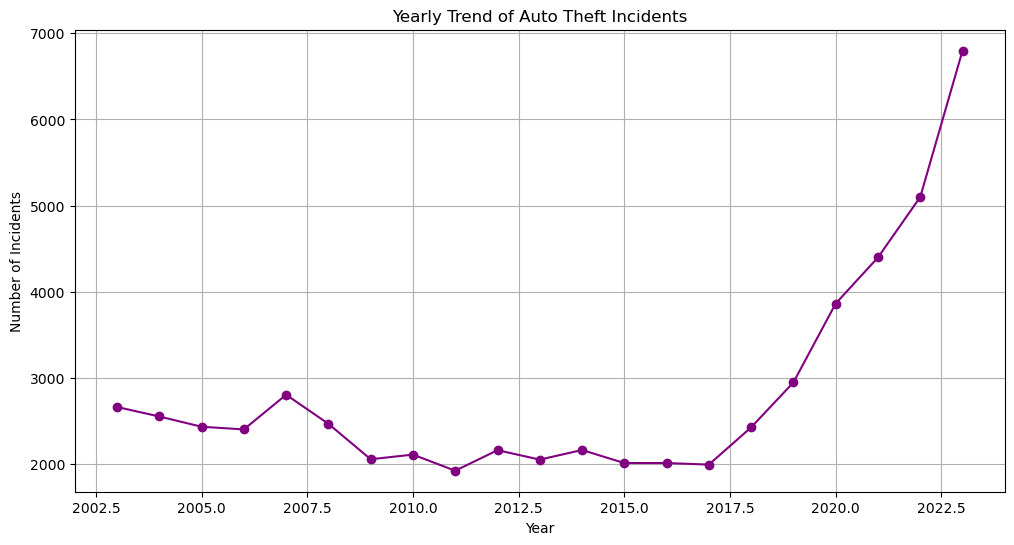

In [10]:
#Yearly Trend line

# Count the number of incidents per year
yearly_counts = filtered_years['Occurred Date'].dt.year.value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o', linestyle='-', color='purple')
plt.title('Yearly Trend of Auto Theft Incidents')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()